In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import random
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc
from xgboost.sklearn import XGBClassifier
from sklearn. compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import joblib
from sklearn. preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from scipy import stats
from scipy.stats import randint
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score



In [178]:
# load the dataset into the notebook
filename = 'cleaned_df.csv'
df = pd.read_csv(filename)

In [179]:
# display the dataframe
df


,Is self-employed,Comp_employees,Works at a tech company,Do you have previous employers,fam_mh_illness,prev_mh,Has MHD,diagnosed_mh,So:What_diagnosis?,Sought_mh_treat,Age,Gender,Age Group,Country live,US State live,Country work,US State work,Work position,Work remotely,Response
0,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Not eligible for coverage / N/A
1,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,No response
2,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,No
3,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,No
4,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,I don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59803,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,NaN,Other,NaN,Other,Sometimes,Somewhat open
59804,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,NaN,Other,NaN,Other,Sometimes,Maybe/Not sure
59805,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,NaN,Other,NaN,Other,Sometimes,No
59806,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,NaN,Other,NaN,Other,Sometimes,Not applicable to me


In [180]:
df['US State live'] = df['US State live'].fillna('No US State')
df['US State work'] = df['US State work'].fillna('No US State')

In [181]:
# Data Encoding
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Is self-employed [False, True]
label_Comp_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_Works at a tech company [False, True, nan]
label_Do you have previous employers [False, True]
label_fam_mh_illness ["I don't know", 'No', 'Yes']
label_prev_mh ['Maybe', 'No', 'Yes']
label_Has MHD ['Maybe', 'No', 'Yes']
label_diagnosed_mh [False, True]
label_So:What_diagnosis? ['ADD ', 'Addictive Disorder', 'Anxiety Disorder ', 'Asperger Syndrome', 'Attention Deficit Hyperactivity Disorder', 'Autism ', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety', 'Autism Spectrum Disorder', 'Burn out', 'Depression', 'Eating Disorder ', 'Gender Identity Disorder', 'Mood Disorder ', 'No disorder', 'Obsessive-Compulsive Disorder', 'PDD-NOS', 'Personality Disorder ', 'Post-traumatic Stress Disorder', 'Psychotic Disorder ', 'Schizotypal Personality Disorder', 'Seasonal Affective Disorder', 'Stress Response Syndromes', 'Substance Use Disorde

In [182]:
# Get rid of response
df.drop(columns='Response')

,Is self-employed,Comp_employees,Works at a tech company,Do you have previous employers,fam_mh_illness,prev_mh,Has MHD,diagnosed_mh,So:What_diagnosis?,Sought_mh_treat,Age,Gender,Age Group,Country live,US State live,Country work,US State work,Work position,Work remotely
0,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
1,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
2,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
3,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
4,0,2,1,1,1,2,1,1,2,0,20,1,3,1,30,1,31,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59803,0,1,1,0,0,2,2,0,13,0,6,2,0,0,30,0,31,11,2
59804,0,1,1,0,0,2,2,0,13,0,6,2,0,0,30,0,31,11,2
59805,0,1,1,0,0,2,2,0,13,0,6,2,0,0,30,0,31,11,2
59806,0,1,1,0,0,2,2,0,13,0,6,2,0,0,30,0,31,11,2


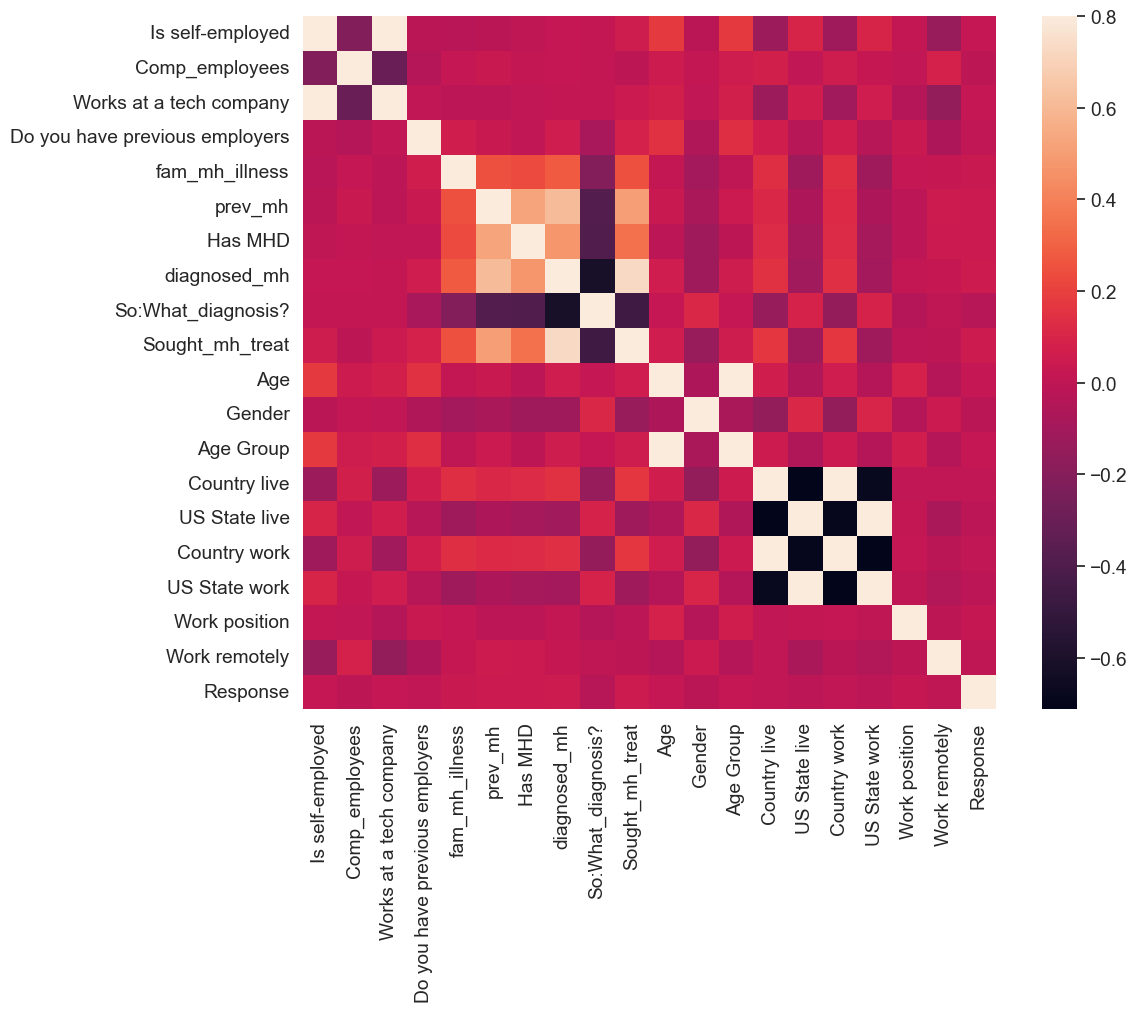

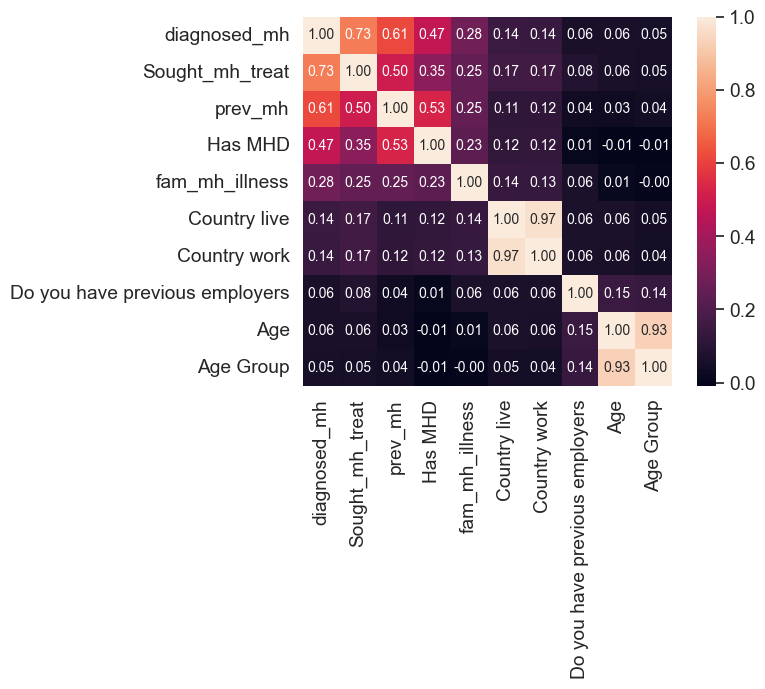

In [183]:
correl = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = correl.nlargest(k, 'diagnosed_mh')['diagnosed_mh'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We are going to scale the following columns since they are extremely different from the other columns

-AGE
-US STATE LIVE
-US STATE WORK
-WORK POSITION

In [184]:
# Scaling Age
scaler = MinMaxScaler()
features = ['Age', 'Work Position']

In [185]:
# Check the number of unique values in the dataframe
df.nunique()

Is self-employed                     2
Comp_employees                       6
Works at a tech company              3
Do you have previous employers       2
fam_mh_illness                       3
prev_mh                              3
Has MHD                              3
diagnosed_mh                         2
So:What_diagnosis?                  25
Sought_mh_treat                      2
Age                                 44
Gender                               3
Age Group                           10
Country live                         3
US State live                       48
Country work                         3
US State work                       49
Work position                       15
Work remotely                        3
Response                          2065
dtype: int64

In [186]:
# Scale and tranform 'Age' and 'Work position' columns
for i in df.columns:
    if i == 'Age' or i == 'Work position':        
        df[i] = scaler.fit_transform(df[[i]])

df.head()

,Is self-employed,Comp_employees,Works at a tech company,Do you have previous employers,fam_mh_illness,prev_mh,Has MHD,diagnosed_mh,So:What_diagnosis?,Sought_mh_treat,Age,Gender,Age Group,Country live,US State live,Country work,US State work,Work position,Work remotely,Response
0,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,1383
1,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,1352
2,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,1341
3,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,1341
4,0,2,1,1,1,2,1,1,2,0,0.465116,1,3,1,30,1,31,0.071429,2,465


FEATURES TO USE AS X
- IS SELF-EMPLOYED
- WORKS AT A TECH COMPANY
- FAM_MH_ILLNESS
- prev_mh
- HAS MHD
- AGE
- GENDER
- WORK REMOTELY
- WORK POSITION

In [187]:
features = ['Is self-employed', 'Works at a tech company', 'fam_mh_illness', 'prev_mh', 'Has MHD','Age','Gender','Work position','Work remotely']

In [188]:
x = df[features]
y = df['diagnosed_mh']

In [189]:
x

,Is self-employed,Works at a tech company,fam_mh_illness,prev_mh,Has MHD,Age,Gender,Work position,Work remotely
0,0,1,1,2,1,0.465116,1,0.071429,2
1,0,1,1,2,1,0.465116,1,0.071429,2
2,0,1,1,2,1,0.465116,1,0.071429,2
3,0,1,1,2,1,0.465116,1,0.071429,2
4,0,1,1,2,1,0.465116,1,0.071429,2
...,...,...,...,...,...,...,...,...,...
59803,0,1,0,2,2,0.139535,2,0.785714,2
59804,0,1,0,2,2,0.139535,2,0.785714,2
59805,0,1,0,2,2,0.139535,2,0.785714,2
59806,0,1,0,2,2,0.139535,2,0.785714,2


In [190]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


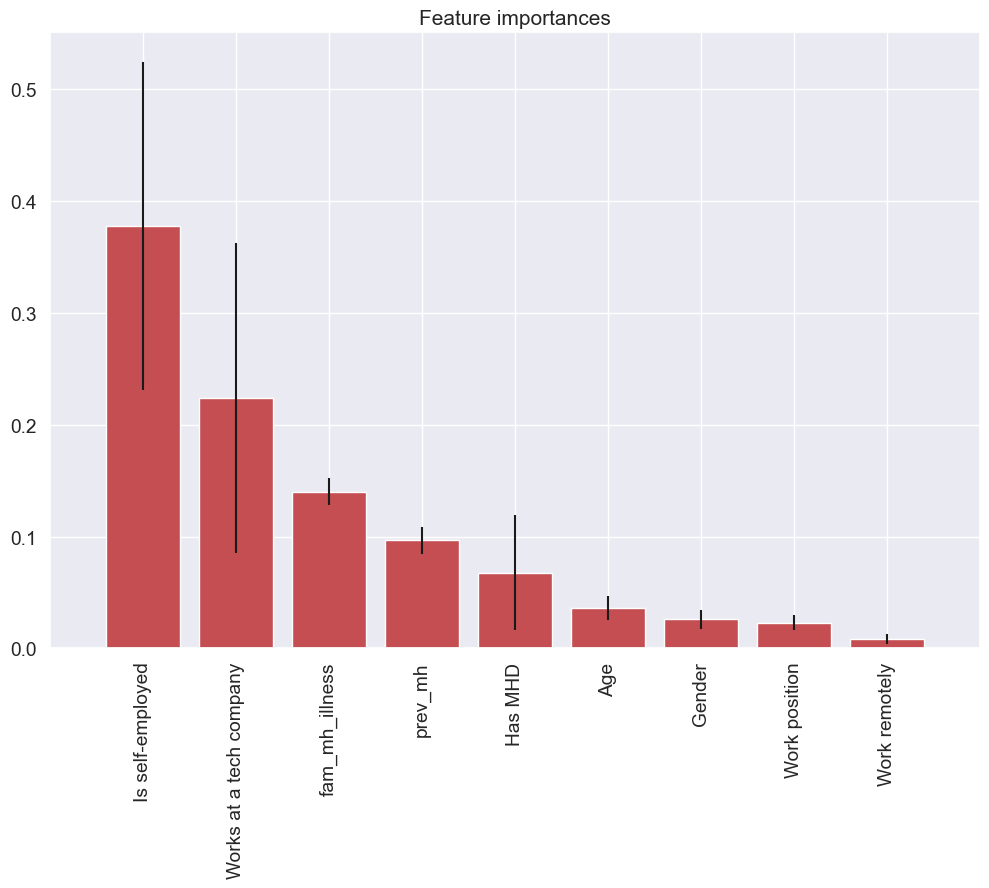

In [191]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=2500,
                              random_state=42)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(x.shape[1]):
    labels.append(features[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), labels, rotation='vertical')
plt.xlim([-1, x.shape[1]])
plt.show()

In [ ]:
def evaluation_func(model, y_test, y_pred, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, x, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

## MACHINE LEARNING MODELS

In [205]:
method = {}
rmse = ()

#### RANDOM FOREST CLASSIFIER

In [204]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(x, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(x, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [206]:
rf_results=[]
def rf_classifier():
    # store the model
    forest = RandomForestClassifier(n_estimators = 20)
    
    # set the parameters for the random forest model
    featuresSize = features.__len__()
    param_dist = {"max_depth": [3, None],"max_features": randint(1, featuresSize),"min_samples_split": randint(2, 9),"min_samples_leaf": randint(1, 9),"criterion": ["gini", "entropy"]}
    
    # Tune the model with already defined Randomised Search CV
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building the model
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    
    rf_model = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred = rf_model.predict(X_test)
    
    # store the prediction and convert to dataframe
    rf_results = pd.DataFrame({'Index': X_test.index, 'Has Diagnosed Mental Health': y_pred})
    
    print('********************Results********************')
    print(rf_results)
    rf_results.to_csv('rf_results.csv', index=False)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evaluation_func(rf_model, y_test, y_pred, True)

    #Data for final graph
    method['R. Forest'] = accuracy_score * 100

In [207]:
randomForest()

Rand. Best Score:  0.8904492263404906
Rand. Best Params:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 8}
[0.893, 0.891, 0.889, 0.89, 0.888, 0.89, 0.89, 0.889, 0.89, 0.89, 0.89, 0.89, 0.892, 0.89, 0.888, 0.89, 0.89, 0.889, 0.89, 0.89]
********************Results********************
       Index  Treatment
0       6769          0
1      19913          1
2      49122          1
3      11524          1
4       1554          0
...      ...        ...
11957  44341          1
11958  56089          1
11959  24433          1
11960  27368          1
11961   3161          0

[11962 rows x 2 columns]
########### Random Forests ###############


NameError: name 'evalClassModel' is not defined

### KNeighbors Classifier

In [211]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # From https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evaluation_func(knn, y_test, y_pred, True)

    #Data for final graph
    method['KNN'] = accuracy_score * 100

In [212]:
Knn()

Rand. Best Score:  0.8174152598054374
Rand. Best Params:  {'weights': 'distance', 'n_neighbors': 16}
[0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817, 0.817]
########### KNeighborsClassifier ###############
Accuracy: 0.9965724795184752
Null accuracy:
 diagnosed_mh
0    6096
1    5866
Name: count, dtype: int64
Percentage of ones: 0.4903862230396255
Percentage of zeros: 0.5096137769603746
True: [0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1]


UnboundLocalError: cannot access local variable 'y_pred_class' where it is not associated with a value

In [ ]:
### Logistic Regression

In [ ]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evaluation_function_function_funcation_func(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    method['Log. Regres.'] = accuracy_score * 100

In [ ]:
logisticRegression()

In [ ]:
### Decision Tree Classifier

In [ ]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = features.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evaluation_func(tree, y_test, y_pred, True)

    #Data for final graph
    method['Tree clas.'] = accuracy_score * 100

In [132]:
# def random_forest_classification(df, test_size=0.2, random_state=42, n_estimators=20, 
#                                  max_depth_values=[3, None], max_features_dist=(1, 'auto'), 
#                                  min_samples_split_dist=(2, 9), min_samples_leaf_dist=(1, 9), 
#                                  criterion=['gini', 'entropy']):
#     """
#     Perform Random Forest classification on the given DataFrame.

#     Parameters:
#     - df: DataFrame containing features and target variable.
#     - test_size: Fraction of the dataset to include in the test split (default: 0.2).
#     - random_state: Random seed for reproducibility (default: 42).
#     - n_estimators: Number of trees in the forest (default: 20).
#     - max_depth_values: List of values for max_depth hyperparameter (default: [3, None]).
#     - max_features_dist: Tuple representing the range and distribution of max_features (default: (1, 'auto')).
#     - min_samples_split_dist: Tuple representing the range and distribution of min_samples_split (default: (2, 9)).
#     - min_samples_leaf_dist: Tuple representing the range and distribution of min_samples_leaf (default: (1, 9)).
#     - criterion: List of splitting criteria (default: ['gini', 'entropy']).

#     Returns:
#     - accuracy: Accuracy score of the model on the testing set.
#     """
#     # Hyperparameter tuning
#     forest = RandomForestClassifier(n_estimators=n_estimators)
#     features_size = len(x.columns)
#     param_dist = {
#         "max_depth": max_depth_values,
#         "max_features": randint(*max_features_dist),
#         "min_samples_split": randint(*min_samples_split_dist),
#         "min_samples_leaf": randint(*min_samples_leaf_dist),
#         "criterion": criterion
#     }
#     tuningRandomizedSearchCV(forest, param_dist)
    
#     # Build and fit the Random Forest model
#     forest = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
#     my_forest = forest.fit(X_train, y_train)
    
#     # Make class predictions for the testing set
#     y_pred_class = my_forest.predict(X_test)
#     results = pd.DataFrame({'Index': X_test.index, 'Treatment': y_pred_class})
    
#     # Print results and save to CSV file
#     print('********************Results********************')
#     print(results)
#     results.to_csv('results.csv', index=False)
#     print('########### Random Forests ###############')
    
#     # Calculate accuracy score
#     accuracy = accuracy_score(y_test, y_pred_class)
#     print("Accuracy:", accuracy)
    
#     return accuracy

In [133]:
# random_forest_classification(df)

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [76]:
# col_trans = ColumnTransformer([('oe', OrdinalEncoder(),['Is self-employed','Comp_employees','Works at a tech company','Do you have previous employers','fam_mh_illness',
#                         'prev_mh','Has MHD','Sought_mh_treat','Age', 'Gender', 'Age Group',
#                         'Country live','US State live','Country work','US State work','Work remotely', 'Work position','Response'])], remainder = 'passthrough')